In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# Set the display options as needed
pd.set_option("display.max_rows",100)  # Show all rows
pd.set_option("display.max_columns",30)

In [4]:
df=pd.read_csv('/content/Subha Ecostone Phase 1 _ Land MIS.xlsx - Price list & Availability (1).csv')
df.head()

,Villa NO,PLOT SIZE,PLOT FACING,Plot Area in SFT,BUA,PLC (INR per Sft),Sharing,Investor,Release Status,Land Cost (Plot area*6850),Construction Cost (BUA*3650),Sale Consideration (A),GST @5% (B),Dev. of clubhouse,Bescom & Bwssb @ 200/- Per Sqft,Legal & Incidental Charges,GST on other charges,Total Cost of Villa (A+B),Other charges (C),Total Villa Cost,Availability Status,Name
0,1.0,ODD,SOUTH,2980.0,4643,0.0,M M Yuvaraj,Birla,Released,"2,04,13,000","1,69,46,950","3,73,59,950","18,67,998","3,00,000","9,28,600","50,000","2,21,148","3,92,27,948","14,99,748","4,07,27,696",Available,NaN
1,2.0,9.0X15.0,SOUTH-EAST (East),1453.0,2666,500.0,M M Yuvaraj,Birla,Released,"99,53,050","97,30,900","2,10,16,950","10,50,848","3,00,000","5,33,200","50,000","1,49,976","2,20,67,798","10,33,176","2,31,00,974",Sold,Sold by landlord
2,3.0,9.0X15.0,EAST,2510.0,Custom,300.0,M M Yuvaraj,Birla,Released,"1,71,93,500",#VALUE!,#VALUE!,#VALUE!,"3,00,000",#VALUE!,"50,000",#VALUE!,#VALUE!,#VALUE!,#VALUE!,NaN,NaN
3,4.0,9.0X15.0,EAST,2510.0,Custom,300.0,M M Yuvaraj,Birla,Released,"1,71,93,500",#VALUE!,#VALUE!,#VALUE!,"3,00,000",#VALUE!,"50,000",#VALUE!,#VALUE!,#VALUE!,#VALUE!,NaN,NaN
4,5.0,ODD,WEST,2205.0,Custom,0.0,M M Yuvaraj,Birla,Released,"1,51,04,250",#VALUE!,#VALUE!,#VALUE!,"3,00,000",#VALUE!,"50,000",#VALUE!,#VALUE!,#VALUE!,#VALUE!,Blocked_M,working on merging the plots and re designing ...


In [5]:
df.shape

(88, 22)

In [6]:
df.describe()

,Villa NO,Plot Area in SFT,PLC (INR per Sft)
count,87.000000,87.000000,87.000000
mean,44.000000,1494.908046,231.034483
std,25.258662,540.404513,201.338743
min,1.000000,619.000000,0.000000
25%,22.500000,1163.000000,0.000000
50%,44.000000,1258.000000,300.000000
75%,65.500000,1587.000000,300.000000
max,87.000000,3813.000000,500.000000


In [7]:
df.columns

Index(['Villa NO', 'PLOT SIZE', 'PLOT FACING', 'Plot Area in SFT', 'BUA',
       'PLC (INR per Sft)', 'Sharing', 'Investor', 'Release Status',
       'Land Cost (Plot area*6850)', 'Construction Cost (BUA*3650)',
       'Sale Consideration (A)', 'GST @5% (B)', 'Dev. of clubhouse',
       'Bescom & Bwssb @ 200/- Per Sqft', 'Legal & Incidental Charges',
       'GST on other charges', 'Total Cost of Villa (A+B)',
       'Other charges (C)', 'Total Villa Cost', 'Availability Status', 'Name'],
      dtype='object')

In [8]:
filtered_columns = [feature for feature in df.columns if df[feature].isnull().sum() >0]
filtered_columns

['Villa NO',
 'PLOT SIZE',
 'PLOT FACING',
 'Plot Area in SFT',
 'BUA',
 'PLC (INR per Sft)',
 'Sharing',
 'Investor',
 'Release Status',
 'Land Cost (Plot area*6850)',
 'Construction Cost (BUA*3650)',
 'GST @5% (B)',
 'Dev. of clubhouse',
 'Bescom & Bwssb @ 200/- Per Sqft',
 'Legal & Incidental Charges',
 'GST on other charges',
 'Total Cost of Villa (A+B)',
 'Other charges (C)',
 'Total Villa Cost',
 'Availability Status',
 'Name']

In [9]:
#df.isna().sum()
df.fillna(0, inplace=True)

In [10]:
facing_val=df['PLOT FACING'].value_counts().values
facing_val

array([29, 20, 12,  6,  5,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

([<matplotlib.patches.Wedge at 0x78f230f42d40>,
 [Text(0.3998587524711543, 1.0247502027675879, 'WEST'),
  Text(-1.0962429369358824, -0.09083734484335798, 'EAST'),
  Text(-0.18105397445685598, -1.0849974462335736, 'NORTH'),
  Text(0.6016430102375327, -0.9208831023709363, 'SOUTH-EAST (East)'),
  Text(0.9449593706169064, -0.5630735190748188, 'SOUTH'),
  Text(1.0849974419956991, -0.18105399985305384, 'SOUTH-WEST (West)')],
 [Text(0.21810477407517506, 0.5589546560550478, '38.16%'),
  Text(-0.5979506928741176, -0.04954764264183162, '26.32%'),
  Text(-0.09875671334010326, -0.5918167888546765, '15.79%'),
  Text(0.3281689146750178, -0.5022998740205107, '7.89%'),
  Text(0.515432383972858, -0.30713101040444657, '6.58%'),
  Text(0.5918167865431085, -0.0987567271925748, '5.26%')])

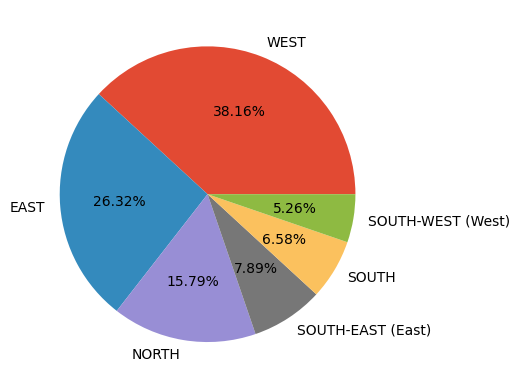

In [14]:
#Top 3 Sold out facing plots with percentage
#Observation=West facing are more plots about 40% campare to other facing plots
plt.pie(facing_val[:6],labels=facing_direction[:6],autopct='%1.2f%%')

In [13]:
facing_direction=df['PLOT FACING'].value_counts().index
facing_direction

Index([              'WEST',               'EAST',              'NORTH',
        'SOUTH-EAST (East)',              'SOUTH',  'SOUTH-WEST (West)',
              'SOUTH-WEST ', 'NORTH-EAST (North)', 'SOUTH-WEST (South)',
       'NORTH-WEST (North)', 'SOUTH-EAST (South)',         'NORTH-WEST',
        'NORTH-EAST (East)',  'NORTH-WEST (West)',        'NORTH-EAST ',
        'NORTH-EAST(North)',                    0],
      dtype='object')

In [15]:
df.columns
df['Total Villa Cost'] = df['Total Villa Cost'].str.replace(',', '').replace('#VALUE!', '0').astype(float)
df['Total Villa Cost']


0     40727696.0
1     23100974.0
2            0.0
3            0.0
4            0.0
5            0.0
6     18869984.0
7     23100974.0
8     22541114.0
9     21981260.0
10    28537116.0
11    23434138.0
12    23475346.0
13    13914217.0
14    26791368.0
15    29875841.0
16    39703728.0
17           0.0
18    19860189.0
19    14962738.0
20    16770965.0
21    25912251.0
22    18517782.0
23    18984822.0
24    22541114.0
25    22541114.0
26    22541114.0
27    30495563.0
28    33344529.0
29    17275675.0
30    17715509.0
31    24616289.0
32    18869984.0
33    17715509.0
34    17813952.0
35    19255157.0
36    18517782.0
37    18984822.0
38    24625476.0
39    18517782.0
40    21121467.0
41    17308877.0
42    17715509.0
43    17715509.0
44    18869984.0
45    18869984.0
46    17715509.0
47    18197480.0
48    19201069.0
49    18517782.0
50    18984822.0
51    18984822.0
52    18517782.0
53    18517782.0
54    19747699.0
55     9514590.0
56    17085042.0
57    17715509.0
58    16669400

In [16]:
PlotsStatus_result=df.groupby(['PLOT FACING','Plot Area in SFT','Availability Status','Total Villa Cost']).size().reset_index().rename(columns={0:'Count_of_plots_sold'})
PlotsStatus_result

,PLOT FACING,Plot Area in SFT,Availability Status,Total Villa Cost,Count_of_plots_sold
0,EAST,1163.0,Sold,18517782.0,5
1,EAST,1163.0,Sold Plot,18517782.0,1
2,EAST,1232.0,Sold,19255157.0,1
3,EAST,1258.0,Sold,19201069.0,1
4,EAST,1334.0,Sold,19747699.0,1
5,EAST,1453.0,Sold,22541114.0,1
6,EAST,1455.0,Sold,21981260.0,1
7,EAST,1489.0,Sold,22835112.0,1
8,EAST,1523.0,Sold,23079657.0,1
9,EAST,1525.0,Sold,21121467.0,1


In [17]:
# Based on facing indicating a diverse range of options for potential buyers.EAST, NORTH, NORTH-EAST, SOUTH-WEST
#observation:Most of the plots were sold in east direction range 1100-1600 sft range
#west facing plots most of the plots are not sold
#There is variability in the plot area and total villa cost for plots with the same facing direction. This could be due to factors such
#...as location within the development, amenities, or other property-specific attributes

<Axes: xlabel='PLOT FACING', ylabel='Total Villa Cost'>

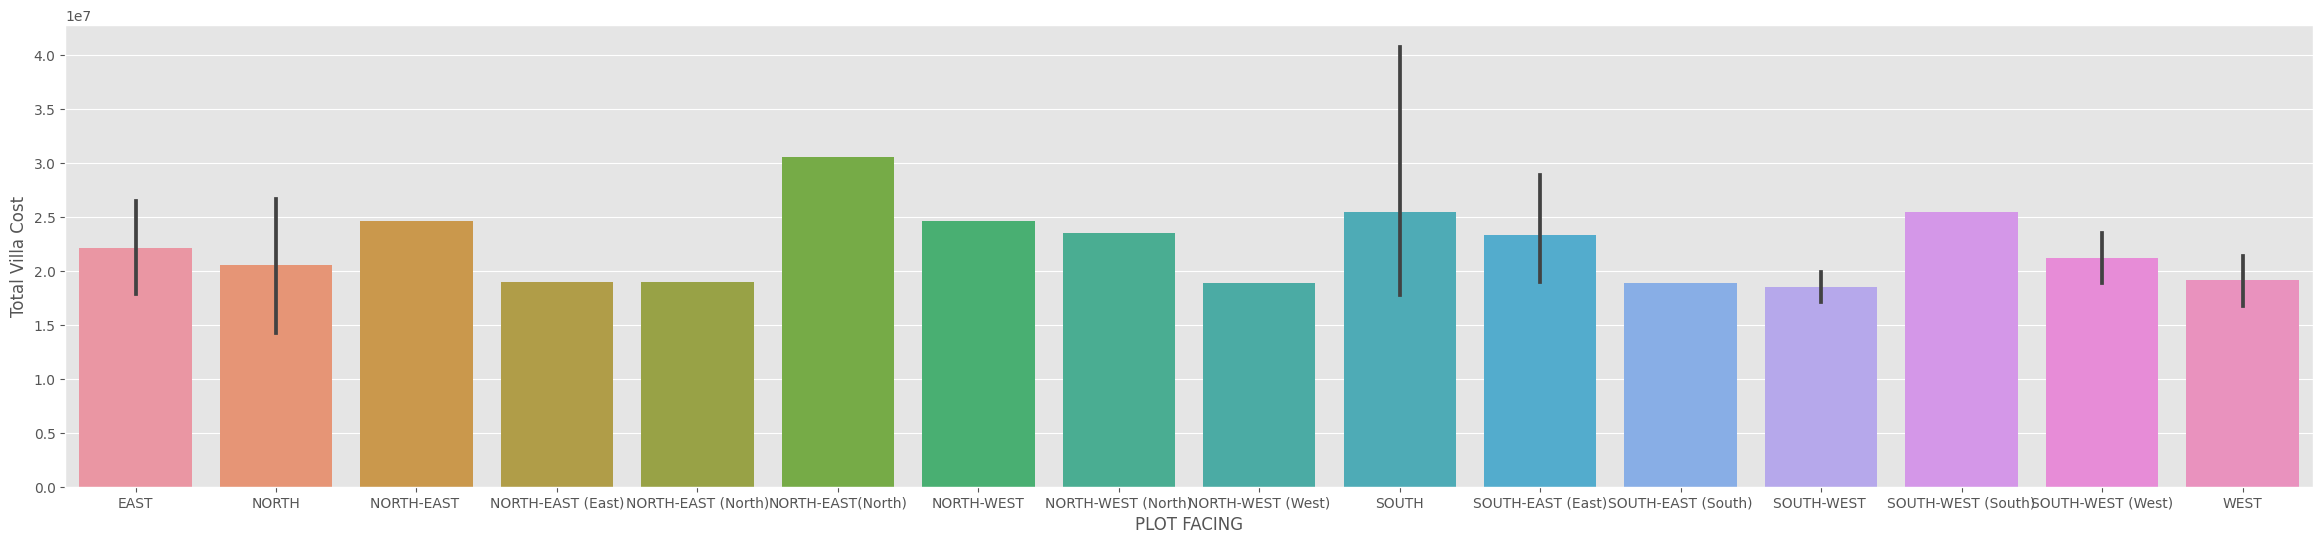

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (29, 6)
sns.barplot(x='PLOT FACING',y='Total Villa Cost',data=PlotsStatus_result)



In [19]:
from pandas._config import reset_option
from numpy.core.fromnumeric import size
#plots which are less than 1200sft
PlotsStatus_result[PlotsStatus_result['Plot Area in SFT']<=1200]

,PLOT FACING,Plot Area in SFT,Availability Status,Total Villa Cost,Count_of_plots_sold
0,EAST,1163.0,Sold,18517782.0,5
1,EAST,1163.0,Sold Plot,18517782.0,1
15,NORTH,913.0,Blocked_M,13914217.0,1
16,NORTH,925.0,Sold,13693682.0,1
17,NORTH,1143.0,Sold,17786543.0,1
18,NORTH,1163.0,Sold,18517782.0,1
26,NORTH-EAST (East),1163.0,Sold,18984822.0,1
27,NORTH-EAST (North),1163.0,Sold,18984822.0,1
31,NORTH-WEST (West),1163.0,Sold,18869984.0,1
32,SOUTH,1163.0,Available,17715509.0,2


In [20]:
PlotsStatus_result[PlotsStatus_result['Plot Area in SFT']<=1200].groupby('PLOT FACING').size().reset_index()

,PLOT FACING,0
0,EAST,2
1,NORTH,4
2,NORTH-EAST (East),1
3,NORTH-EAST (North),1
4,NORTH-WEST (West),1
5,SOUTH,2
6,SOUTH-EAST (East),2
7,SOUTH-EAST (South),1
8,SOUTH-WEST,1
9,SOUTH-WEST (West),1


In [22]:
df.columns

Index(['Villa NO', 'PLOT SIZE', 'PLOT FACING', 'Plot Area in SFT', 'BUA',
       'PLC (INR per Sft)', 'Sharing', 'Investor', 'Release Status',
       'Land Cost (Plot area*6850)', 'Construction Cost (BUA*3650)',
       'Sale Consideration (A)', 'GST @5% (B)', 'Dev. of clubhouse',
       'Bescom & Bwssb @ 200/- Per Sqft', 'Legal & Incidental Charges',
       'GST on other charges', 'Total Cost of Villa (A+B)',
       'Other charges (C)', 'Total Villa Cost', 'Availability Status', 'Name'],
      dtype='object')

In [24]:
correlation_matrix = df.corr()
print(correlation_matrix)









                   Villa NO  Plot Area in SFT  PLC (INR per Sft)  \
Villa NO           1.000000         -0.194353          -0.182143   
Plot Area in SFT  -0.194353          1.000000           0.060344   
PLC (INR per Sft) -0.182143          0.060344           1.000000   
Total Villa Cost   0.113892          0.225689           0.154234   

                   Total Villa Cost  
Villa NO                   0.113892  
Plot Area in SFT           0.225689  
PLC (INR per Sft)          0.154234  
Total Villa Cost           1.000000  


<ipython-input-24-a6856e176268>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


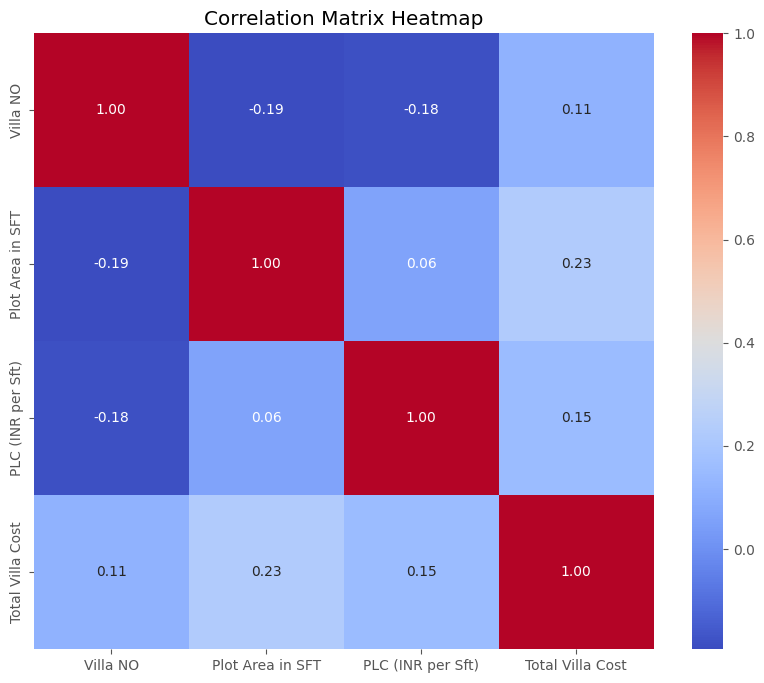

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
#There is a weak positive correlation (0.11) between "Villa NO" and "Total Villa Cost."
#There is a weak positive correlation (0.23) between "Plot Area in SFT" and "Total Villa Cost."
#There is a weak positive correlation (0.15) between "PLC (INR per Sft)" and "Total Villa Cost."







In [53]:
df['Investor'] = df['Investor'].astype(str)
investor_counts = df['Investor'].value_counts()
investor_counts


Birla             35
0                 28
JP Team            7
JP & Venkatesh     5
Arjun              3
Birla/JP 3         3
JP 2               3
Kalyan             1
Subraman           1
Jyothika           1
JP 3               1
Name: Investor, dtype: int64

Text(0.5, 1.0, 'Investor Analysis')

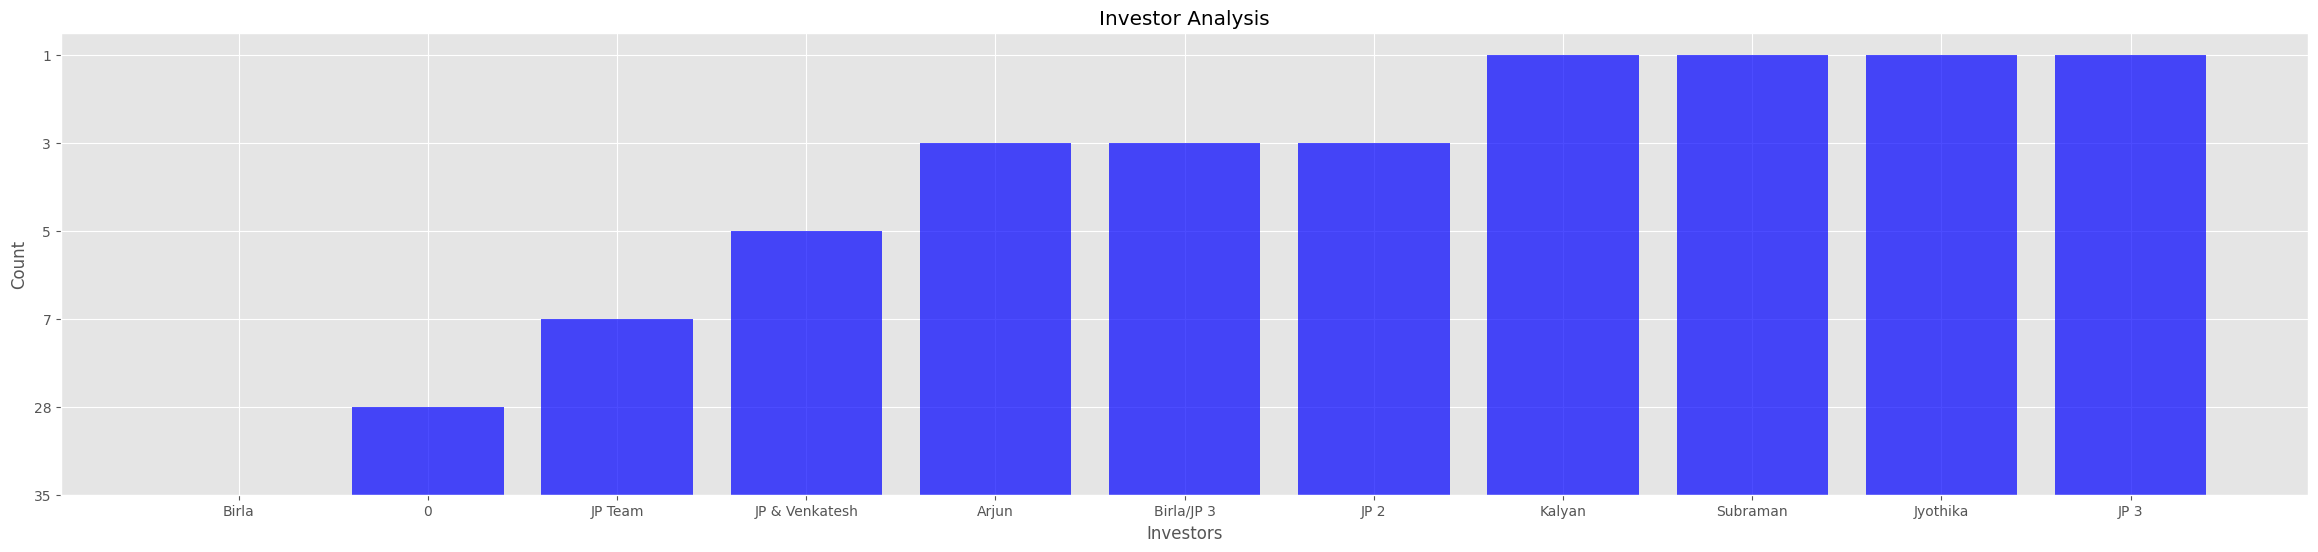

In [55]:
plt.bar(investor_counts.index, investor_counts.values.astype(str), color='blue', alpha=0.7)
plt.xlabel('Investors')
plt.ylabel('Count')
plt.title('Investor Analysis')

#observation
# majority of properties are owned by investors associated with the name 'Birla', accounting for 35 properties
#Individual Buyers: There are 28 properties categorized as '0'. This could indicate properties purchased by individual buyers
#Demand Patterns: Higher counts associated with certain investors, like 'Birla', 'JP Team', and 'JP & Venkatesh', could suggest strong demand for properties in those categories.
#The presence of investors like 'Birla/JP 3', 'JP 2', and 'JP 3' indicates that some properties might have multiple investors associated with them






In [56]:
release_status_counts = df['Release Status'].value_counts()

# Display the release status counts
print(release_status_counts)

Released    87
0            1
Name: Release Status, dtype: int64
